Hi there. I made this little notebook as a way of getting somewhat familiar with pandas and matplotlib, and as a way of getting familiar with Transport for Greater Manchester's spending over the past year. As a consequence, the questions I'm trying to poke at are more about how money is spent, who it goes to, and a little investigation as to why it goes there. This is very much a work in progress, I have two and a half years of software development behind me and not much else, so please excuse any shoddiness you might see. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from utilities import sort_suppliers_by_service_area, total_expenses_per_supplier, total_expenses, create_lists_from_columns

%matplotlib inline

df = pd.read_csv('resources/sanitised-data-2324Qtr1Payments.csv')
df.reset_index()
display(df)

,Body Name,Service Area,Expense Type,Invoice Payment Date,Transaction Number,Net Amount,Supplier Name
0,TfGM,Transport,Planning Support Services,03/04/2023,5100184107,"8,869.30",AECOM LTD
1,TfGM,Transport,Planning Support Services,03/04/2023,5100185084,"1,000.00",AECOM LTD
2,TfGM,Transport,Driver Intervention Course Delivery Costs,03/04/2023,1900087630,"2,011.97",AKHTAR HUSSAIN
3,TfGM,Transport,Driver Intervention Course Delivery Costs,03/04/2023,1900087629,"1,261.10",ALAN HOLT
4,TfGM,Transport,Capital Costs - Design Support Services,03/04/2023,5100185013,"2,255.00",AMEY MAP SERVICES LTD
...,...,...,...,...,...,...,...
4378,TfGM,Transport,Capital Costs - Programme and Project Manageme...,30/06/2023,5100189406,"2,586.20",REAL STAFFING GROUP
4379,TfGM,Transport,Smart Ticketing,30/06/2023,5100189409,"2,500.00",REAL STAFFING GROUP
4380,TfGM,Transport,Capital Costs - Programme and Project Manageme...,30/06/2023,5100189410,"2,941.20",REAL STAFFING GROUP
4381,TfGM,Transport,Smart Ticketing,30/06/2023,5100189411,"2,068.96",REAL STAFFING GROUP


So, let's start on my journey of data science. I was interested in exactly who money was going to over this quarter and what service they were contracted by. I created a function in my utilities to sort 

In [2]:
suppliers = sort_suppliers_by_service_area(df)

expenses_per_supplier = {"Supplier": [], "Service": [], "Expense": []}
for service in suppliers.keys():
    for supplier in suppliers[service]:
        expenses_per_supplier["Supplier"].append(supplier)
        expenses_per_supplier["Service"].append(service)
        expenses_per_supplier["Expense"].append(total_expenses_per_supplier(df, supplier))

suppliers_and_expenses_df = pd.DataFrame.from_dict(expenses_per_supplier)
display(suppliers_and_expenses_df)


,Supplier,Service,Expense
0,AECOM LTD,Transport,324579.08
1,AKHTAR HUSSAIN,Transport,5888.72
2,ALAN HOLT,Transport,3793.10
3,AMEY MAP SERVICES LTD,Transport,619137.65
4,ANDREW MCPHERSON,Transport,3676.53
...,...,...,...
453,SATISNET LIMITED,Corporate Services,2779.80
454,USECURE LIMITED,Corporate Services,787.50
455,COALESCENT LIMITED,Corporate Services,9880.00
456,Barclays,Corporate Services,1998.08


And in order of most expensive to least. This data has some entries that were under £500, which I can segregate out to another data frame.

In [3]:
suppliers_sorted_by_expense_q3_23 = suppliers_and_expenses_df.sort_values(by="Expense", ascending=False)
suppliers_sorted_by_expense_q3_23.reset_index()
display(suppliers_sorted_by_expense_q3_23)

,Supplier,Service,Expense
43,KEOLIS AMEY METROLINK LTD,Transport,33783820.04
197,WILLMOTT DIXON CONSTRUCTION LIMITED,Transport,18627881.39
66,STAGECOACH SERVICES LTD,Transport,15183586.77
231,ALEXANDER DENNIS LTD,Transport,11358750.00
130,GO NORTH WEST LTD,Transport,7748203.10
...,...,...,...
347,CLEANING MACHINE SUPPORT LTD,Transport,490.00
302,LOW CARBON VEHICLE PARTNERSHIP,Transport,468.00
361,STORMSAVER LTD,Transport,452.28
349,LANGUAGE LINE,Transport,449.25


total expense Q1 - 103337791.22


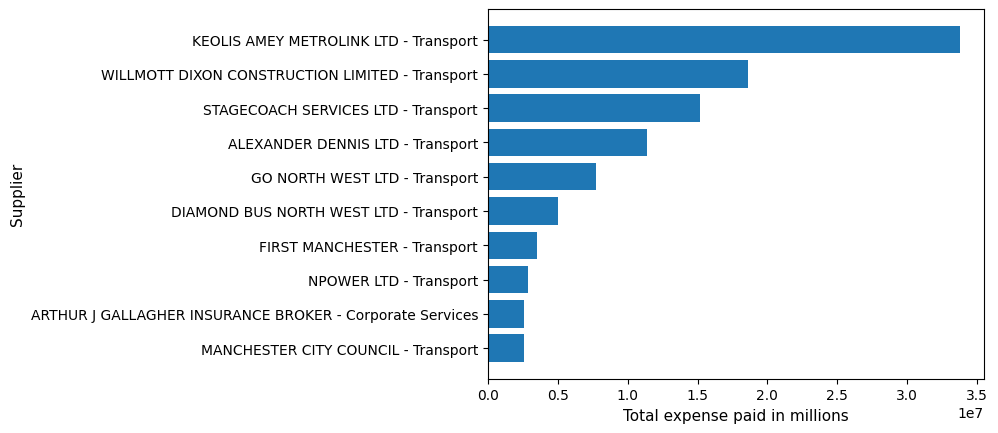

In [4]:
# declare consts for ease of reading 
SUPPLIER = 0
SERVICE = 1
EXPENSE = 2

values_from_columns = create_lists_from_columns(df=suppliers_sorted_by_expense_q3_23, limit=10, all_columns=["Supplier", "Service", "Expense"])

i = 0
y_values = []
while i < len(values_from_columns[SUPPLIER]):
    new_value = f"{values_from_columns[SUPPLIER][i]} - {values_from_columns[SERVICE][i]}"
    y_values.append(new_value)
    i += 1

# print total expenses
total_expense = 0
for expense in values_from_columns[EXPENSE]:
    total_expense += expense
print(f"total expense Q1 - {total_expense}")

# plot ugly bar chart
plt.barh(y_values, values_from_columns[EXPENSE])
plt.ylabel('Supplier', fontsize=11)
plt.xlabel('Total expense paid in millions', fontsize=11)
plt.gca().invert_yaxis()

Let's do all this again with the previous 2 quarters before that. Please forgive how messy this notebook is, give me a break I'm doing this for fun.

Let's make a bar chart for each of the past few quarters. I don't know how to do this gracefully yet, so let's barell on through.

total expense Q1 - 103337791.22


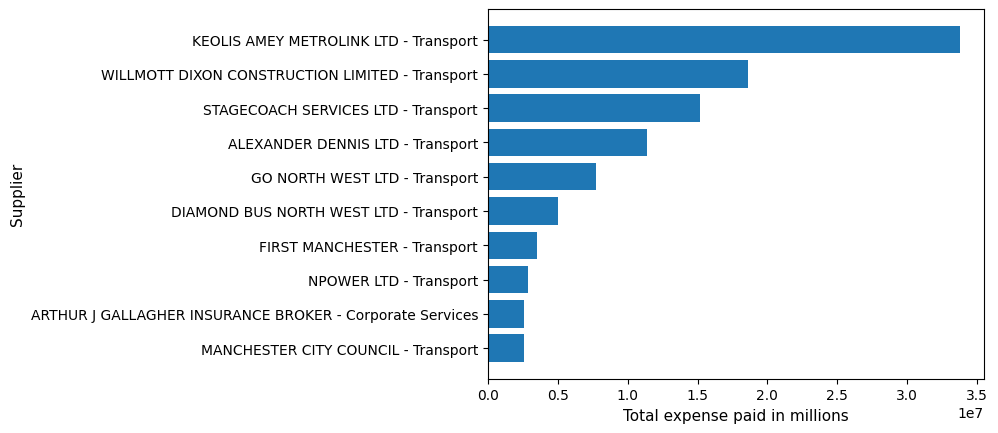

In [5]:
qt3_23_df = pd.read_csv('resources/sanitised-data-2223Qtr4Payments.csv')

suppliers_sorted_by_expense_q3_23 = suppliers_and_expenses_df.sort_values(by="Expense", ascending=False)

# All ugly repeat code.
# declare consts for ease of reading 
SUPPLIER = 0
SERVICE = 1
EXPENSE = 2

values_from_columns = create_lists_from_columns(df=suppliers_sorted_by_expense_q3_23, limit=10, all_columns=["Supplier", "Service", "Expense"])

i = 0
y_values = []
while i < len(values_from_columns[SUPPLIER]):
    new_value = f"{values_from_columns[SUPPLIER][i]} - {values_from_columns[SERVICE][i]}"
    y_values.append(new_value)
    i += 1

# print total expenses
total_expense = 0
for expense in values_from_columns[EXPENSE]:
    total_expense += expense
print(f"total expense Q1 - {total_expense}")

# plot ugly bar chart
plt.barh(y_values, values_from_columns[EXPENSE])
plt.ylabel('Supplier', fontsize=11)
plt.xlabel('Total expense paid in millions', fontsize=11)
plt.gca().invert_yaxis()

TO DO: 
* Top 10 spending over the last year. If it's the same for each one then I don't have to do anything else, can just add those up. I mean it probably will be cos it's only a year. actually yeah, what other insights can I get from this? Maybe I could find all the schools?